<a href="https://colab.research.google.com/github/JuanaPinzonR/Proyecto_Computacional/blob/main/Presa_Depredador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploración sistemática del modelo Presa-Deperedador**

*Valentina Naranjo*  58000385

**Las ecuaciones de Lotka-Volterra**

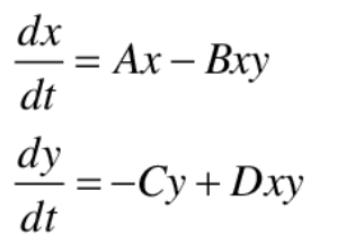

A partir de las ecuaciones anteriores, los parámetros pueden interpretarse de la siguiente manera:



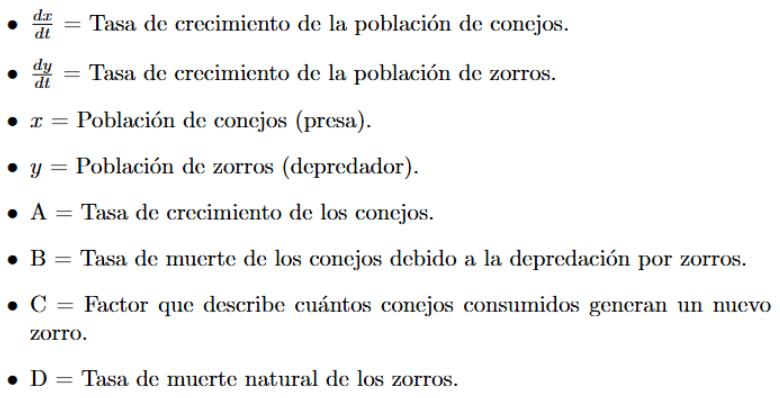

## Modelo de Lotka-Volterra

Aquí simularemos el comportamiento de las poblaciones de conejos y zorros utilizando el modelo determinista de Lotka-Volterra.

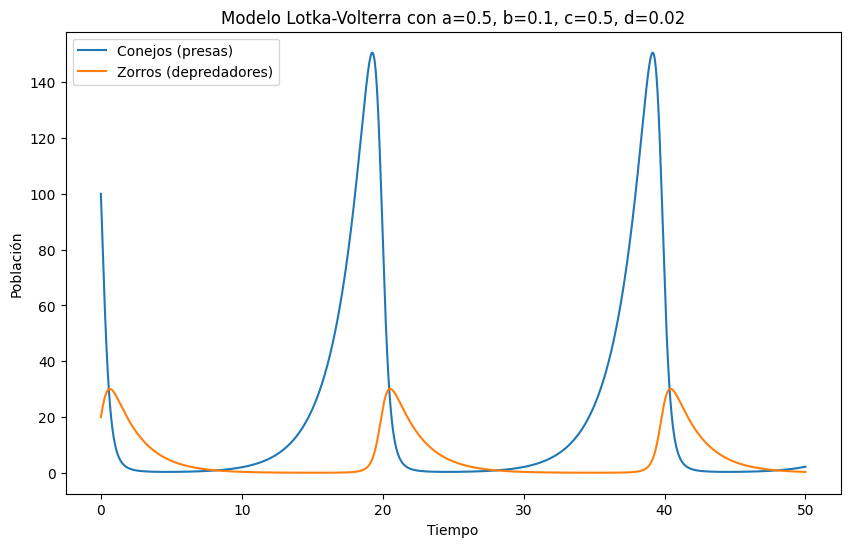

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


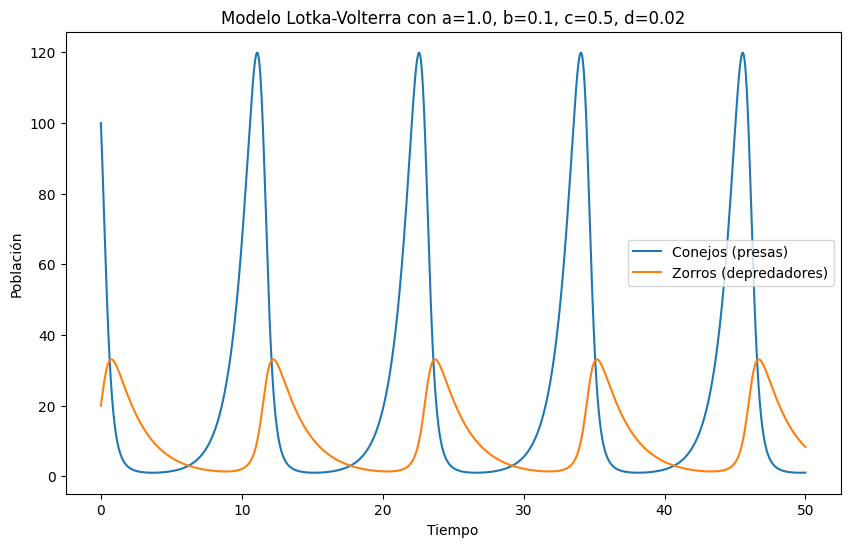

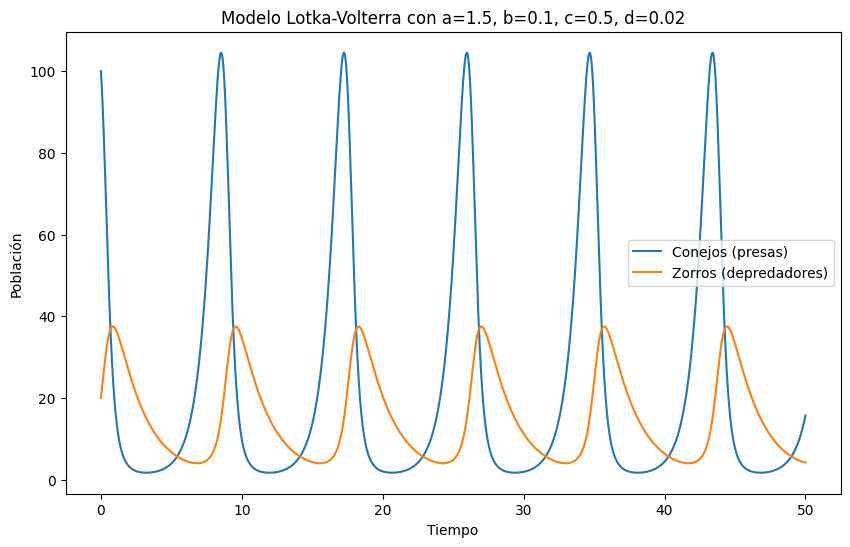

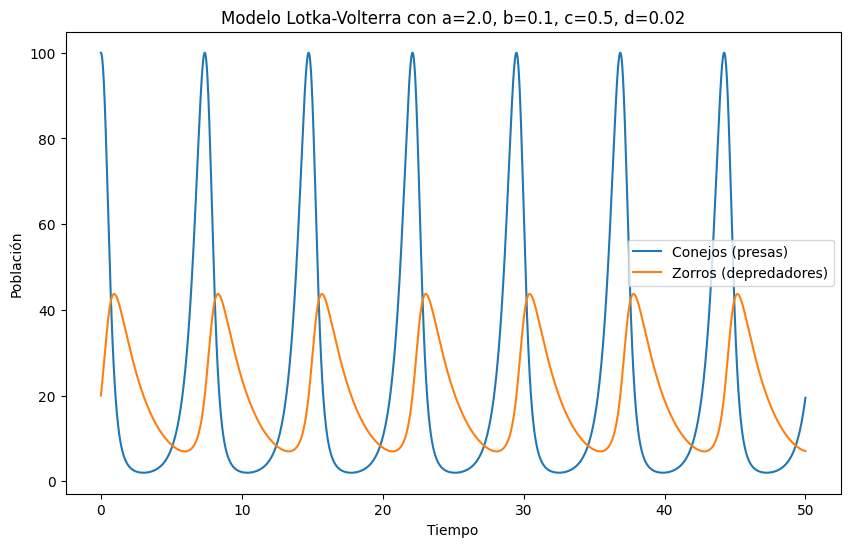

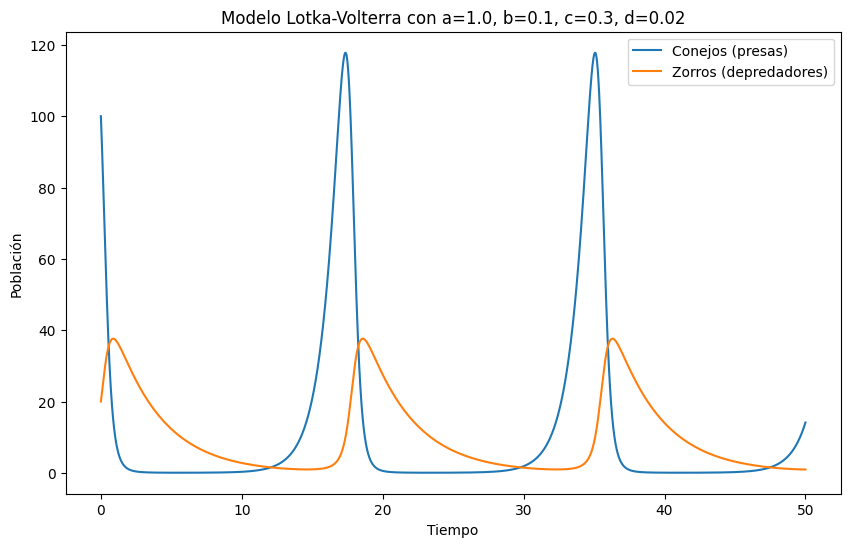

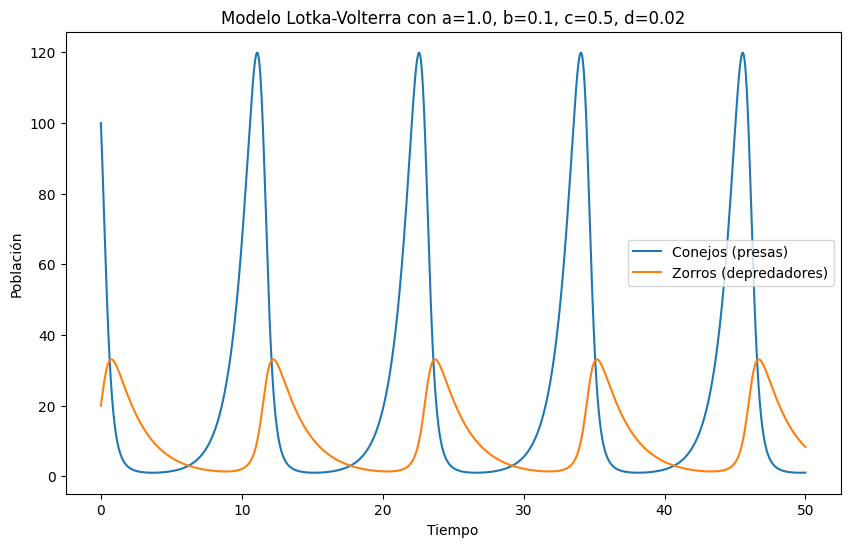

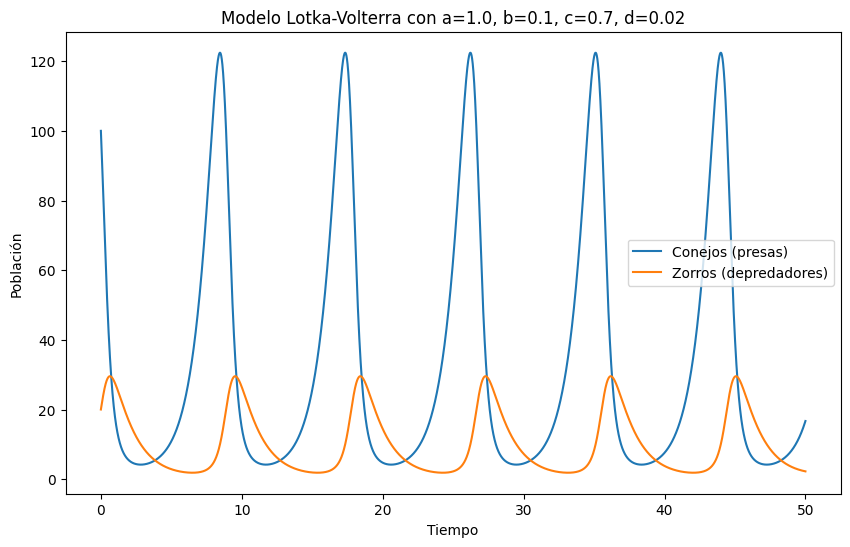

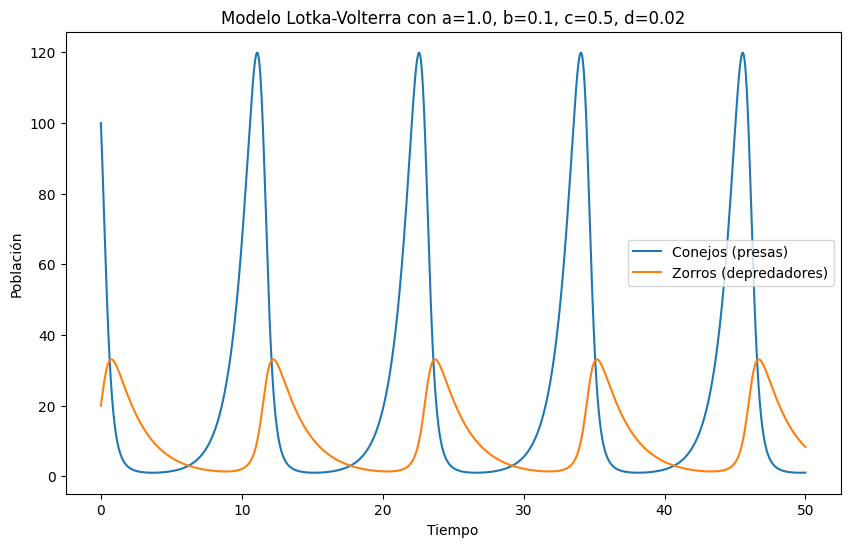

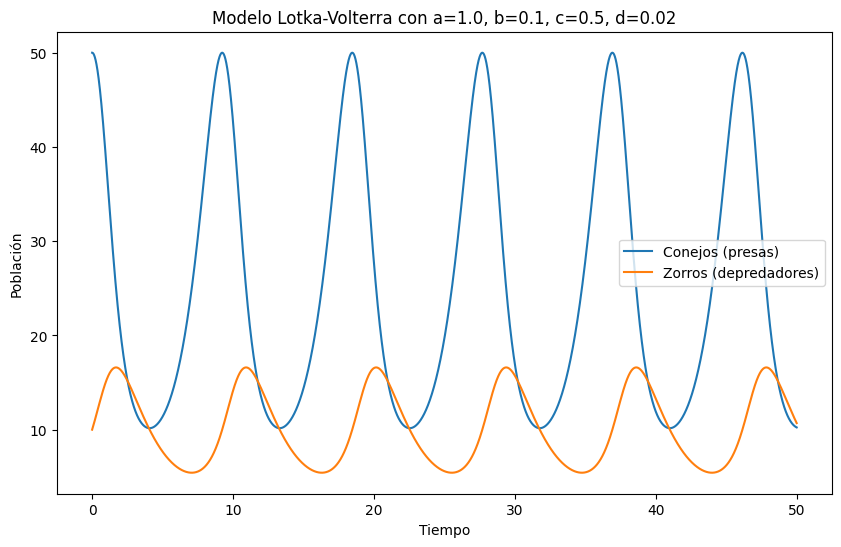

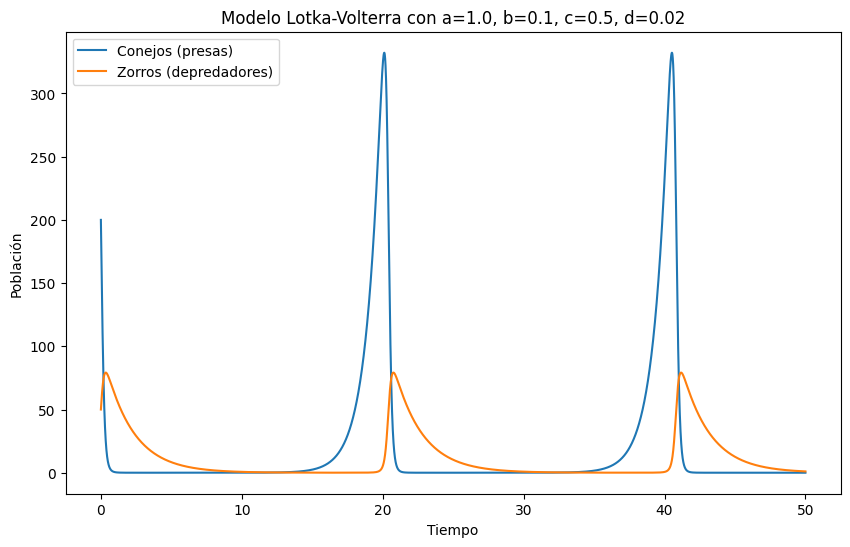

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Definición del modelo
def modelo(p, t, a, b, c, d):
    x, y = p
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    return [dxdt, dydt]

tiempo_final = 50
paso_tiempo = 0.0001
t = np.arange(0, tiempo_final, paso_tiempo)

# Poblaciones iniciales
x0 = 100  # Conejos
y0 = 20   # Zorros
p0 = [x0, y0]

# Parámetros base
a = 1.0
b = 0.1
c = 0.5
d = 0.02

def simular_sistema(a, b, c, d):
    solucion = odeint(modelo, p0, t, args=(a, b, c, d))
    x, y = solucion[:, 0], solucion[:, 1]

    plt.figure(figsize=(10, 6))
    plt.plot(t, x, label='Conejos (presas)')
    plt.plot(t, y, label='Zorros (depredadores)')
    plt.xlabel('Tiempo')
    plt.ylabel('Población')
    plt.legend()
    plt.title(f'Modelo Lotka-Volterra con a={a}, b={b}, c={c}, d={d}')
    plt.show()

tasas_crecimiento = [0.5, 1.0, 1.5, 2.0]
for a_valor in tasas_crecimiento:
    simular_sistema(a_valor, b, c, d)

tasas_mortalidad = [0.3, 0.5, 0.7]
for c_valor in tasas_mortalidad:
    simular_sistema(a, b, c_valor, d)

poblaciones_iniciales = [(100, 20), (50, 10), (200, 50)]
for x0, y0 in poblaciones_iniciales:
    p0 = [x0, y0]
    simular_sistema(a, b, c, d)


### **1. ¿Qué sucede si modificamos la tasa de crecimiento de las presas (conejo)?**
Al aumentar la tasa de crecimiento de las presas (`a`), la población de conejos crece más rápido, lo que también permite que haya más alimento para los depredadores (zorros), aumentando indirectamente su población. Sin embargo, si crece demasiado, puede provocar oscilaciones más grandes e incluso inestabilidad en el sistema.  
Por el contrario, si `a` disminuye, los conejos no se reproducen lo suficiente y los zorros pueden extinguirse por falta de alimento.

---

### **2. ¿Qué sucede si modificamos la tasa de mortalidad natural de los depredadores (zorro)?**
Al aumentar la tasa de mortalidad de los depredadores (`c`), los zorros mueren más rápido, por lo que la población de depredadores disminuye. Esto podría permitir que los conejos se reproduzcan sin control.  
Si `c` disminuye, los zorros sobreviven más tiempo incluso cuando hay pocos conejos, lo que podría llevar a una disminución drástica de la población de presas y eventualmente afectar también a los depredadores por falta de alimento.

---

### **3. ¿Qué sucede si modificamos la eficiencia de conversión del depredador?**
La eficiencia de conversión (`d`) representa cuán eficaz es el zorro para transformar conejos cazados en nueva descendencia.  
Si `d` aumenta, los zorros se reproducen más rápido al comer conejos, lo que puede causar una subida rápida de su población, seguida de una caída si las presas se agotan.  
Si `d` es muy baja, los zorros no logran reproducirse lo suficiente aunque haya presas, y su población puede colapsar.

---

### **4. ¿Qué sucede si modificamos las condiciones iniciales del sistema?**
Cambiar las poblaciones iniciales (por ejemplo, empezar con más conejos o más zorros) afecta el punto de partida del sistema, pero no necesariamente su comportamiento general si el sistema es estable.  
Con muchas presas al inicio, los depredadores tienen un pico inicial más grande. Con muchos depredadores desde el inicio, las presas pueden desaparecer rápidamente y luego los depredadores también caerán.  
Esto muestra que el sistema es sensible a las condiciones iniciales en el corto plazo, pero puede estabilizarse en ciclos a largo plazo.

---

### **5. ¿Cuál de los parámetros tiene mayor efecto en la estabilidad del sistema?**
El parámetro que más afecta la estabilidad del sistema es la eficiencia de conversión del depredador (`d`), ya que determina cuán rápido puede crecer la población de zorros a partir de la caza.  
Un `d` muy alto puede desestabilizar el sistema rápidamente si los zorros se reproducen demasiado y eliminan a las presas.  
También tiene un impacto importante la tasa de mortalidad del depredador (`c`), ya que si es demasiado baja, los zorros sobreviven aunque no haya alimento, y si es muy alta, mueren antes de poder cazar.


# **Conclusiones**

A lo largo del análisis se observó que la tasa de crecimiento de las presas influye directamente en la disponibilidad de alimento para los depredadores, afectando así la dinámica poblacional del sistema. La tasa de mortalidad natural del depredador resulta clave para evitar una sobrepoblación en situaciones de escasez de presas, mientras que la eficiencia de conversión del depredador fue identificada como el parámetro más crítico, ya que un valor elevado puede llevar a un crecimiento descontrolado de los depredadores y, eventualmente, a la inestabilidad del sistema. Las condiciones iniciales modifican el comportamiento a corto plazo, aunque si los parámetros son adecuados, el sistema tiende a estabilizarse en ciclos regulares. En conclusión, se concluye que el modelo refleja la sensibilidad de los ecosistemas a cambios en sus parámetros clave, destacando la importancia de mantener un equilibrio natural para preservar su estabilidad a largo plazo.
